In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Read data


In [7]:

class DF:
    def __init__(self, path="data/mmm/"):
        self.path = path
        self.first = pd.read_csv(f"{path}/firstfile.csv",index_col=0)
        self.m_inv = pd.read_csv(f"{path}MediaInvestment.csv")
        self.nps = pd.read_csv(f"{path}MonthlyNPSscore.csv")
        self.prods = pd.read_csv(f"{path}ProductList.csv")
        self.sales = pd.read_csv(f"{path}Sales.csv", sep="\t")
        self.second = pd.read_csv(f"{path}Secondfile.csv", index_col=0)
        self.special = pd.read_csv(f"{path}SpecialSale.csv")
df = DF()



C:\Users\mamma\AppData\Local\Temp\ipykernel_16224\1371187324.py:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  self.sales = pd.read_csv(f"{path}Sales.csv", sep="\t")


# EDA

In [25]:
df.m_inv.head(2)

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.1,0.2,2.5,7.4,0.0,1.3,0.5,5.0,NaN,NaN
1,2015,8,5.1,0.0,1.3,1.1,0.0,0.1,0.1,2.5,NaN,NaN


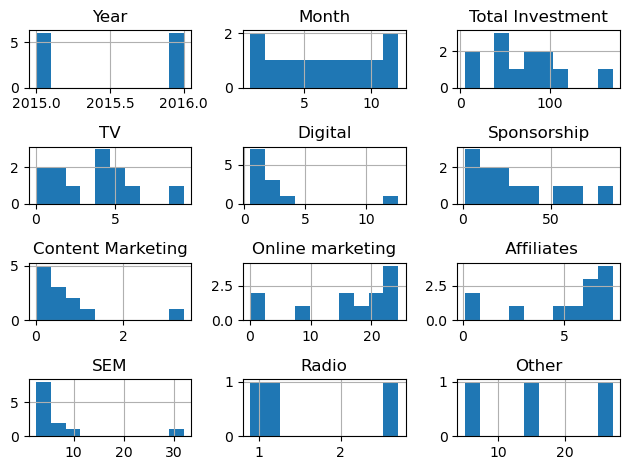

In [37]:
df.m_inv.hist()
plt.tight_layout()


<Axes: >

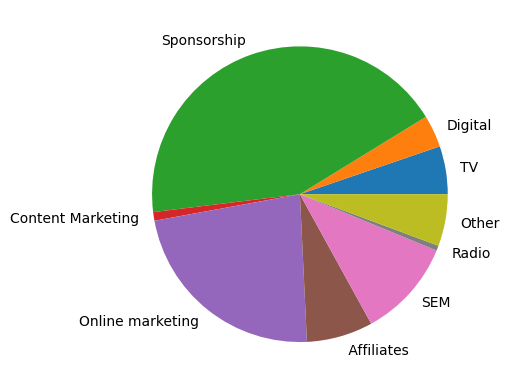

In [44]:
df.m_inv.sum().iloc[3:].plot(kind="pie")

# Product info

In [24]:
df.prods.head(2)


,Product,Frequency,Percent
0,\N,5828,0.4
1,AmplifierReceiver,4056,0.2


##  The Net Promoter Score (NPS)

Customer Sentiment:


In [26]:
df.nps.head(2)

,Date,NPS
0,7/1/2015,54.6
1,8/1/2015,60.0


# Sales


- GMV (gross merchandise value)
- MRP (maximum retail price)

In [28]:
df.sales.head(2)

,ID,Date,ID_Order,ID_Item_ordered,GMV,Units_sold,SLA,Product_Category,Analytic_Category,Sub_category,product_analytic_vertical,MRP,Procurement_SLA
0,ACCCX3S58G7B5F6P,17-10-2015 15:11,3.420000e+15,3.420000e+15,6400,1,5,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,19-10-2015 10:07,1.420000e+15,1.420000e+15,6900,1,7,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0


C:\Users\mamma\AppData\Local\Temp\ipykernel_16224\1064772583.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df.sales["YearMonth"] = pd.to_datetime(df.sales["Date"]).dt.strftime("%Y-%m")


In [32]:
df.first.head(2)

,Date,Sales_name,gmv_new,units,product_mrp,discount,product_category,product_subcategory,product_vertical
1,2015-07-01,No Promotion,3040.0,1,3650.0,610.0,EntertainmentSmall,HomeAudio,HomeAudioSpeaker
2,2015-07-01,No Promotion,310.0,1,400.0,90.0,EntertainmentSmall,Speaker,LaptopSpeaker


In [43]:
df.second.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   month                        12 non-null     object 
 1   Revenue_Camera               12 non-null     float64
 2   Revenue_CameraAccessory      12 non-null     float64
 3   Revenue_EntertainmentSmall   12 non-null     float64
 4   Revenue_GameCDDVD            12 non-null     float64
 5   Revenue_GamingHardware       12 non-null     float64
 6   total_gmv                    12 non-null     float64
 7   Units_Camera                 12 non-null     int64  
 8   Units_CameraAccessory        12 non-null     int64  
 9   Units_EntertainmentSmall     12 non-null     int64  
 10  Units_GameCDDVD              12 non-null     int64  
 11  Units_GamingHardware         12 non-null     int64  
 12  total_Units                  12 non-null     int64  
 13  Mrp_Camera                 

# Special sales or events

In [33]:
df.special.head(3)

,Date,Sales Name
0,7/18/2015,Eid & Rathayatra sale
1,7/19/2015,Eid & Rathayatra sale
2,8/15/2015,Independence Sale


# Create the train data

In [30]:
df.sales["YearMonth"] = pd.to_datetime(df.sales["Date"], dayfirst=True).dt.to_period("M")
df.sales["GMV"] = pd.to_numeric( df.sales["GMV"], errors='coerce')
df.sales_month = df.sales.groupby(["YearMonth"])[["GMV", "Units_sold","MRP","Procurement_SLA"]].sum()

In [34]:
df.m_inv["YearMonth"] = pd.to_datetime(
    df.m_inv[["Year", "Month"]].assign(Day=1)
).dt.to_period("M")
df.m_inv_2 = df.m_inv[
    [
        "Total Investment",
        "TV",
        "Digital",
        "Sponsorship",
        "Content Marketing",
        "Online marketing",
        " Affiliates",
        "SEM",
        "Radio",
        "Other",
        "YearMonth",
    ]
].set_index("YearMonth")

In [ ]:
dft = df.sales_month.join( df.m_inv_2 )